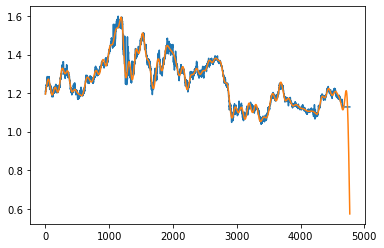

In [64]:
import numpy as np
import pandas_datareader as pdr
from datetime import datetime 
from scipy.linalg import hankel
import matplotlib.pyplot as plt


symbol = "EURUSD=X"
df = pdr.DataReader(symbol, "yahoo", datetime(2000, 1, 1),
                        datetime.now()).drop(columns=["Adj Close", "Volume"])

subset = np.concatenate((df.Close.values, df.Close.values[-1:]*np.ones(100)))
hankel_matrix = hankel(subset)

U, S, VT = np.linalg.svd(hankel_matrix)

first_k_singulars = 80
S = [0 if i > first_k_singulars else j for i, j in zip(range(len(S)), S)]

close = U @ np.diag(S) @ VT

max_col = len(close[0])
max_row = len(close)
fdiag = [[] for _ in range(max_row + max_col - 1)]

for x in range(max_col):
    for y in range(max_row):
        fdiag[x + y].append(close[y][x])

avg_fdiag = []  
for i, j in zip(fdiag, range(1, len(fdiag)+1)):
    avg_fdiag.append(np.sum(i)/j)

close = avg_fdiag[:len(subset)] # take this length of our avg_fdiag as it is a hankel matrix

plt.plot(subset)
plt.plot(close)

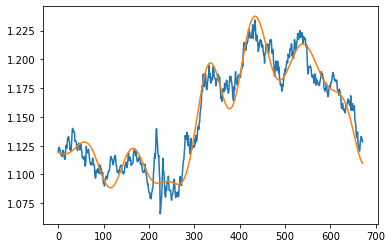

In [63]:
plt.plot(subset[4000:len(df.Close.values)])
plt.plot(close[4000:len(df.Close.values)])